Importing libraries for fraud detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

Reading and analysis of data from dataset

In [3]:
df =pd.read_csv("AIML Dataset.csv")

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [7]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [8]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
df.shape[0]

6362620

In [10]:
round((df["isFraud"].value_counts()[1]/df.shape[0])*100,2)

np.float64(0.13)

Text(0, 0.5, 'count')

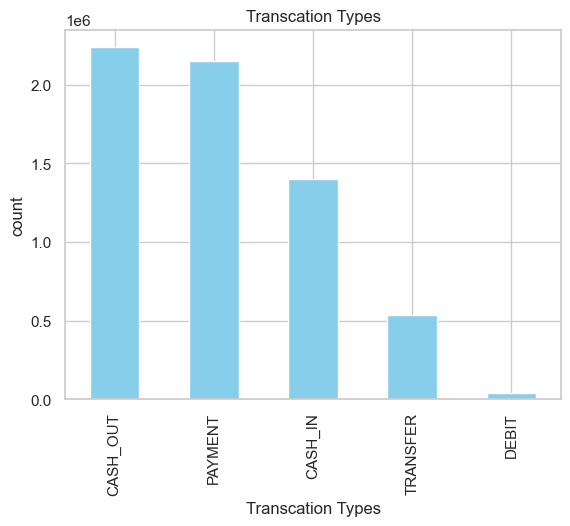

In [11]:
df["type"].value_counts().plot(kind="bar",title="Transcation Types",color="skyblue")
plt.xlabel("Transcation Types")
plt.ylabel("count")

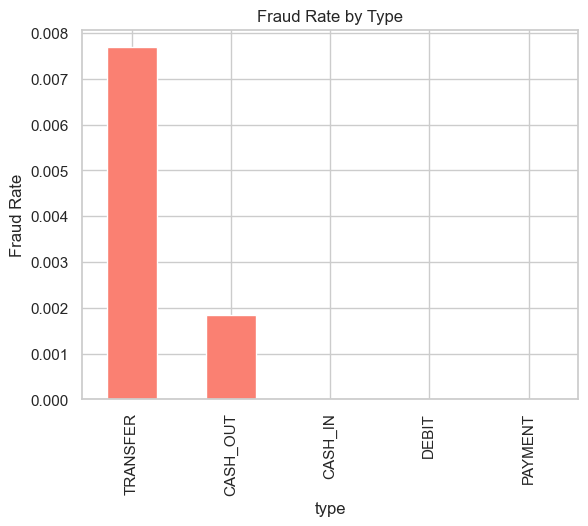

In [12]:
fraud_by_type=df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar",title="Fraud Rate by Type",color="salmon")
plt.ylabel("Fraud Rate")
plt.show()

In [13]:
fraud_by_type


type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64

In [14]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

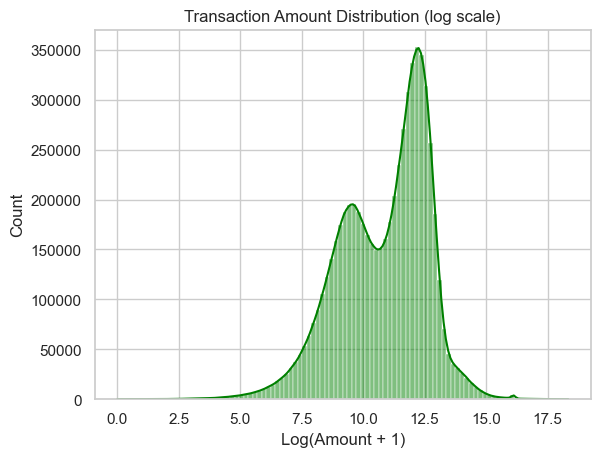

In [15]:
sns.histplot(np.log1p(df["amount"]), bins=100, kde=True, color="green")
plt.title("Transaction Amount Distribution (log scale)")
plt.xlabel("Log(Amount + 1)")
plt.show()

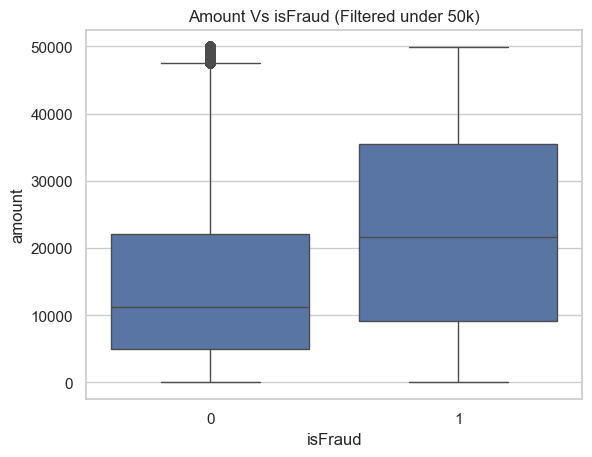

In [16]:
sns.boxplot(data=df[df["amount"]<50000],x="isFraud",y="amount")
plt.title("Amount Vs isFraud (Filtered under 50k)")
plt.show()

In [17]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [18]:
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"] 

In [19]:
(df["balanceDiffOrig"]<0).sum()

np.int64(1399253)

In [20]:
(df["balanceDiffDest"]<0).sum()

np.int64(1238864)

In [21]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


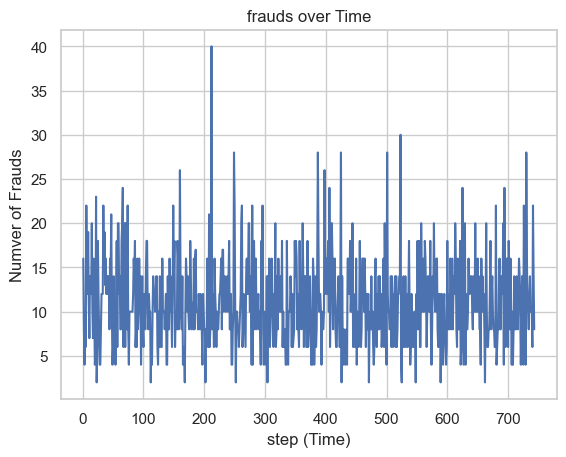

In [22]:
frauds_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index , frauds_per_step.values,label="Frauds per step")
plt.xlabel("step (Time)")
plt.ylabel("Numver of Frauds")
plt.title("frauds over Time")
plt.grid(True)
plt.show()

In [23]:
df.drop(columns="step",inplace=True)

In [24]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [25]:
top_senders=df["nameOrig"].value_counts().head(10)

In [26]:
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [27]:
top_receivers=df["nameDest"].value_counts().head(10)

In [28]:
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [29]:
fraud_users=df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)

In [30]:
fraud_users


nameOrig
C1280323807    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C1039979813    1
C2089752665    1
C1614818636    1
C40604503      1
C1970706589    1
Name: count, dtype: int64

In [31]:
fraud_types=df[df["type"].isin(["TRANSFER","CASH_OUT"])]

In [32]:
fraud_types

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,181.00,0.00
3,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,181.00,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0,15325.00,46430.44
19,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,705.00,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,10835.00,2712905.89
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,339682.13,339682.13
6362616,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,6311409.28,0.00
6362617,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,6311409.28,6311409.27
6362618,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,850002.52,0.00


In [33]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

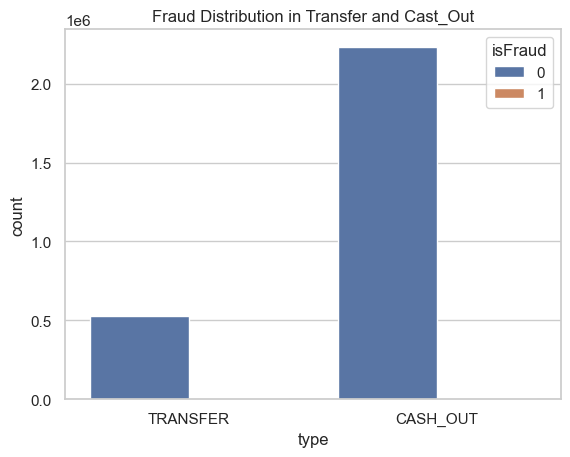

In [34]:
sns.countplot(data=fraud_types,x="type",hue="isFraud")
plt.title("Fraud Distribution in Transfer and Cast_Out")
plt.show()

In [35]:
corr=df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()

In [36]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


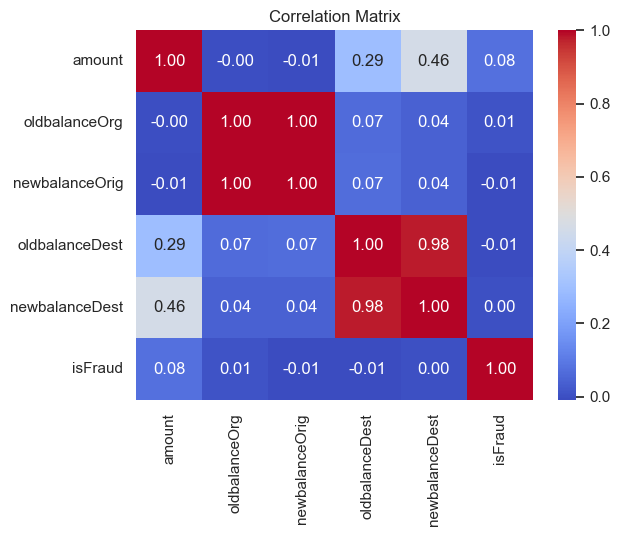

In [37]:
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [38]:
zero_after_transfer=df[
    (df["oldbalanceOrg"]==0)&
    (df["newbalanceOrig"]==0)&
    (df["type"].isin(["TRANSFER","CASH_OUT"]))
]

In [39]:
zero_after_transfer

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
48,CASH_OUT,5346.89,C512549200,0.0,0.0,C248609774,652637.00,6453430.91,0,0,0.0,5800793.91
79,TRANSFER,77957.68,C207471778,0.0,0.0,C1761291320,94900.00,22233.65,0,0,0.0,-72666.35
80,TRANSFER,17231.46,C1243171897,0.0,0.0,C783286238,24672.00,0.00,0,0,0.0,-24672.00
81,TRANSFER,78766.03,C1376151044,0.0,0.0,C1749186397,103772.00,277515.05,0,0,0.0,173743.05
82,TRANSFER,224606.64,C873175411,0.0,0.0,C766572210,354678.92,0.00,0,0,0.0,-354678.92
...,...,...,...,...,...,...,...,...,...,...,...,...
6356051,CASH_OUT,244966.80,C2092646234,0.0,0.0,C211766342,5254563.09,5499529.89,0,0,0.0,244966.80
6356052,CASH_OUT,123403.11,C1054278487,0.0,0.0,C1948756721,606875.62,730278.74,0,0,0.0,123403.12
6362461,CASH_OUT,0.00,C729003789,0.0,0.0,C1388096959,1008609.53,1008609.53,1,0,0.0,0.00
6362463,CASH_OUT,0.00,C2088151490,0.0,0.0,C1156763710,0.00,0.00,1,0,0.0,0.00


In [40]:
len(zero_after_transfer)

1308582

In [41]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
48,CASH_OUT,5346.89,C512549200,0.0,0.0,C248609774,652637.00,6453430.91,0,0,0.0,5800793.91
79,TRANSFER,77957.68,C207471778,0.0,0.0,C1761291320,94900.00,22233.65,0,0,0.0,-72666.35
80,TRANSFER,17231.46,C1243171897,0.0,0.0,C783286238,24672.00,0.00,0,0,0.0,-24672.00
81,TRANSFER,78766.03,C1376151044,0.0,0.0,C1749186397,103772.00,277515.05,0,0,0.0,173743.05
82,TRANSFER,224606.64,C873175411,0.0,0.0,C766572210,354678.92,0.00,0,0,0.0,-354678.92


In [42]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [44]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [45]:
df_model=df.drop(["nameOrig","nameDest","isFlaggedFraud"],axis=1)

In [46]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [47]:
categorical=["type"]
numeric=["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [48]:
print(df_model["isFraud"].isna().sum())

0


In [49]:
df_model = df_model.dropna(subset=["isFraud"])

In [50]:
y = df_model["isFraud"]
x = df_model.drop("isFraud", axis=1)

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y)

In [52]:
preprocessor=ColumnTransformer(
    transformers=[
        ("num",StandardScaler(),numeric),
        ("cat",OneHotEncoder(drop="first"),categorical)
    ],
    remainder="drop"
)

In [53]:
pipeline=Pipeline([
    ("prep",preprocessor),
    ("clf",LogisticRegression(class_weight="balanced",max_iter=1000))
])

In [54]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [55]:
y_pred=pipeline.predict(x_test)

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.94   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.94      0.97   1908786



In [57]:
confusion_matrix(y_test,y_pred)

array([[1800876,  105446],
       [    144,    2320]])

In [58]:
pipeline.score(x_test,y_test)*100

94.46821173248337

In [59]:
import joblib
joblib.dump(pipeline,"fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']